Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline
from IPython.display import Image

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

# Rotation d'une barre inclinée

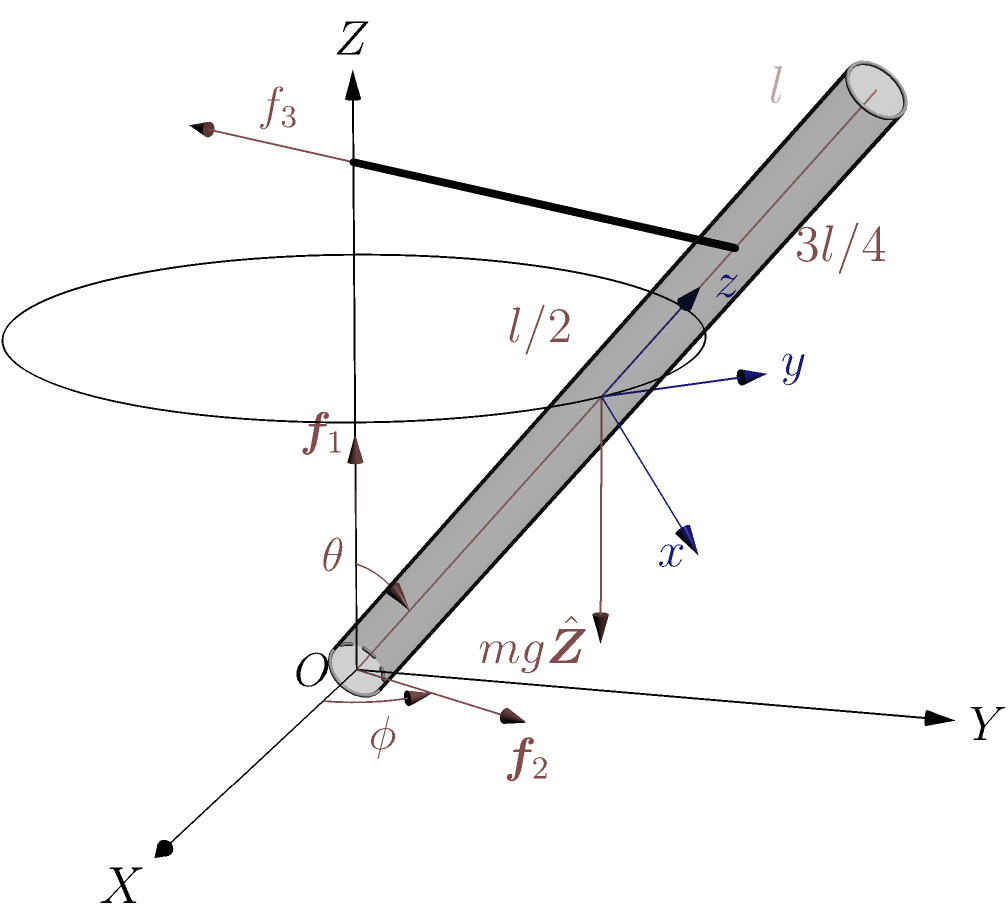

In [72]:
Image(filename='barre_z.png', width=300)

In [14]:
# Symbols
m, g, l = sy.symbols("m, g, ell", positive=True)
phi, theta = sy.symbols("phi, theta", real=True)

Une barre de masse $m$ et de longueur $l$ est fixée au point $O=(0,0,0)$ d'un repère fixe $(X,Y,Z)$. Elle est inclinée d'un angle $\theta=\mathrm{const.}$, tenue par une barre horizontale (parallèle au plan $XY$, et de masse négligeable), et elle tourne autour de l'axe $Z$.

On note $\theta,\phi$ les angles des coordonnées sphériques. La barre tourne à vitesse angulaire constante $\dot\phi=\omega_0$.

### Définition des angles $(\theta,\phi)$

Pour passer du repère fixe $(X,Y,Z)$ au mobile $(x,y,z)$ on fait deux rotations:

* rotation d'angle $\theta$ et axe $\hat{\bm Y}$, $R_Y(\theta)$; le nouveau repere est $(n,Y,z)$
* rotation d'angle $\phi$ autour du nouveau axe $z$, $R_z(\phi)$

la rotation totale (matrice de passage) est donc
$$R(\theta,\phi) = R_z(\phi)R_y(\theta)$$
(on utilise l'expression de matrices de rotation selon les axes de la base canonique).

La base du repère fixe (dans le repère fixe) est $\hat{\bm X}, \hat{\bm Y}, \hat{\bm Z}$. Celle du repère mobile est $\hat{\bm x}, \hat{\bm y}, \hat{\bm z}$. On a, entre les deux, les transformations:
\begin{gather}
\hat{\bm n} = R_y(\theta) \hat{\bm X}\\
\hat{\bm x} = R(\theta,\phi) \hat{\bm X}\\
\hat{\bm y} = R_z(\phi) \hat{\bm Y}\\
\hat{\bm z} = R(\theta, \phi) \hat{\bm Z}
\end{gather}

La barre qui contraint le mouvement, fixant la valuer de $\theta$ est dans la direction du vecteur $\hat{\bm n}$.

In [6]:
# matrices de rotation
def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

def XYZ():
    return sy.Matrix([1,0,0]), sy.Matrix([0,1,0]), sy.Matrix([0,0,1])

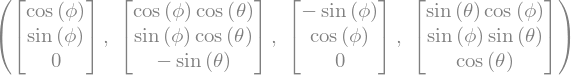

In [8]:
e1, e2, e3 = XYZ() # base canonique
R = R_z(phi)*R_y(theta)
en = R_z(phi)*e1
ex = R*e1
ey = R_z(phi)*e2
ez = R*e3

en, ex, ey, ez

La matrice de rotation du repère mobile par rapport au repère fixe est donc,
$$R(\theta,\phi) =  R_Z(\phi)R_Y(\theta) = \begin{pmatrix}
\cos\theta \cos\phi & -\sin\phi & \sin\theta \cos\phi \\
\cos\theta \sin\phi & \cos\phi & \sin\theta \sin\phi \\
-\sin\theta & 0 & \cos\theta \end{pmatrix}$$

Notez que les *colonnes* de cette matrice correspondent aux vecteurs de la base mobile.

## Cinématique
Le centre de masse se situe à une distance $\ell/2$ de l'origine $O$, ses coordonnées sphériques sont $(\ell/2,\theta,\phi)$, avec
$$\bm n = \cos\phi \hat{\bm X} + \sin\phi \hat{\bm Y}$$
la projection sur le plan $XY$ de la direction du centre de masse.

Les axes du repère mobile sont (voir figure, et calcul plus haut):
\begin{align}
\hat{\bm x} &= \cos\theta \bm n - \sin\theta \hat{\bm Z} \\
\hat{\bm y} &= -\sin\phi \hat{\bm X} + \cos\phi \hat{\bm Y}\\
\hat{\bm z} &= \sin\theta \bm n + \cos\theta \hat{\bm Z}
\end{align}


Le vecteur centre de masse est
$$\bm R = \frac{\ell}{2}\hat{\bm z} = \frac{\ell}{2}(\sin\theta \hat{\bm n} + \cos\theta \hat{\bm Z})$$
et ses dérivées, la vitesse $\bm V$ et l'accélération $\bm a$ sont
$$\bm V = \frac{\ell \dot\phi}{2}\sin\theta \hat{\bm y}$$
(puisque $\dot{\hat{\bm n}}= \dot\phi \hat{\bm y}$) et
$$\bm a = \frac{\ell \ddot\phi}{2} \sin\theta \hat{\bm y} - \frac{\ell \dot\phi^2}{2} \sin\theta \hat{\bm n}$$
(puisque $\dot{\hat{\bm y}}= -\dot\phi \hat{\bm n}$)

### Rotation

Le moment d'inertie (par rapport à l'axe de rotation) est
$$I_x = I_y = I_l = \frac{m\ell^2}{3}, \; I_z = 0$$
La vitesse angulaire est
$$\bm \Omega = \dot\phi \hat{\bm Z}.$$
Dans le repère mobile on a $\hat{\bm Z} = R^T_y(\theta) \hat{\bm z}$
$$\bm \Omega = \dot\phi \begin{pmatrix} -\sin\theta \\ 0 \\ \cos\theta \end{pmatrix}.$$

et le moment cinétique (par rapport toujours à l'axe de rotation) est simplement
$$\bm L = I \bm \Omega = \frac{m\ell^2 \dot\phi}{3} \hat{\bm x}$$

Enfin la dérivée par rapport au temps du moment cinétique est (vue du repère fixe)
$$\frac{\D \bm L}{\D t} = I\dot{\bm \Omega} + \bm\Omega \wedge \bm L  = \frac{m\ell^2}{3} \begin{pmatrix} -\ddot\phi \cos\theta \\ -\frac{1}{2} \dot\phi \sin(2\theta) \\ \ddot\phi \sin\theta \end{pmatrix} $$


In [16]:
phi_t, phi_tt = sy.symbols("phi_t, phi_tt", real=True)

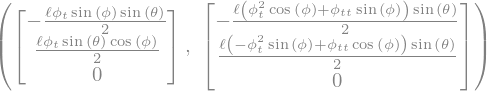

In [34]:
R_M = l/2*ez
V = phi_t*sy.diff(R_M, phi)
a = sy.simplify( phi_tt*sy.diff(V, phi_t) + phi_t*sy.diff(V, phi) )
V, a

In [17]:
# moment d'inertie Io = Ix = Iy, Iz = 0
Io = m*l**2/3

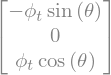

In [12]:
# vitesse angulaire
O = phi_t * R.T*e3
O

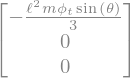

In [31]:
# moment cinétique
L = Io*O[0]*e1 + Io*O[1]*e2
L

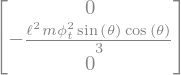

In [32]:
oL = O.cross(L)
oL

In [25]:
f_1,f_2, f_3 = sy.symbols("f_1,f_2, f_3", real=True)

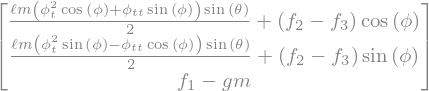

In [37]:
# Forces
F = sy.simplify(-m*g*e3 + f_1*e3) + sy.simplify(f_2*en - f_3*en)
sy.simplify(F-m*a)

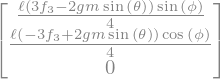

In [40]:
# Moment des forces
sy.simplify(-3*l*f_3/4 * e3.cross(en) + l/2*(-m*g) * ez.cross(e3))

## Newton-Euler

L'équation de Newton relie les accélérations du solide aux forces appliquées
$$m \bm a = \bm F$$
où $\bm F$ est la somme de forces et $\bm a$ l'accélération du centre de masse du solide.

L'équation d'Euler
$$\frac{\D \bm L}{\D t} = \bm M$$
exprime le bilan du moment cinétique et de moment de forces $\bm M$ (couples ou torques) calculés par rapport à l'axe de rotation.

On écrit d'abord les forces appliquées (ici la gravité) et les réaction (au pivot et à la barre):
$$\bm F = -mg \hat{\bm Z} + f_1 \hat{\bm Z} + f_2 \bm n - f_3 \bm n$$


### Newton

L'équation de Newton donne les equations, par composante,
\begin{gather}
-\frac{m\ell}{2} \dot\phi^2 \sin\theta = f_2 - f_3\\
\frac{m\ell}{2} \ddot\phi \sin\theta = 0\\
0 = f_1 - mg
\end{gather}
On en déduit
$$f_1 = mg, \quad \ddot\phi = 0$$
la rotation est donc uniforme $\dot\phi = \omega_0 = \text{const.}$.

### Euler

On calcule maintenant les moment des forces. On note que le poids $mg$ et la corde $f_3$ exercent de moments, tandis que le moment de $f_2$ est nul:
$$\bm M = \frac{3l}{4}\hat{\bm Z} \times (-f_3\hat{\bm n}) + \frac{l}{2}\hat{\bm z} \times (-mg)\hat{\bm Z}$$
ce qui donne:
$$\bm M = \frac{mgl}{2} \sin\theta \hat{\bm y} - \frac{3lf_3}{4} \cos\theta \hat{\bm y}$$
On se rappelle que dans le repère fixe on $\hat{\bm y} = -\sin\phi\hat{\bm X} + \cos\phi \hat{\bm Y}$.

On obtient une équation pour la force $\bm f_3$ (les composantes $X$ et $Y$ de l'équation donnenet la même solution):
$$-\frac{ml^2 \omega_0^2}{3} \sin(\theta)\cos\theta \sin\phi = \left(\frac{mgl}{2} \sin\theta -  \frac{3l}{4} f_3\cos\theta\right)\sin\phi$$
ou en dégageant $f_3$:
$$f_3 = \frac{2mg}{3} \tan\theta + \frac{4m\omega_0^2l}{9}\sin\theta$$
Les autres forces sont
$$f_1 = mg$$
et
$$f_2 = \frac{2mg}{3} \tan\theta - \frac{m\omega_0^2l}{18}\sin\theta$$

# Compléments

## Repère du centre de masse

Dans $(xyz)$ on a (on pose $\dot\phi = \omega_0$)
$$\Omega = \omega_0 R^T_y(\theta)\bm e_z$$
pusique $R^T \bm e_z = \bm e_Z$, nous donne le vecteur $\bm e_Z$ dans les coordonnées du repère mobile.

On a aussi $I^G = ml^2/12$, le moment d'inertie au centre de masse. Par conséquent
$$\bm L = I^G \Omega$$
et
$$\dot{\bm L}_O = m\bm R_O \times \dot{\bm V} + \bm\Omega \times (I^G \bm\Omega)$$
avec $R_O$ la distance entre l'axe de rotation et le centre de masse

In [45]:
omega_0 = sy.symbols("omega_0", positive=True)

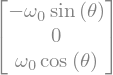

In [46]:
o = omega_0 * R.T*e3
o

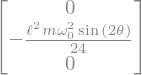

In [47]:
Icorps = (m*l**2/12)*sy.Matrix([[1,0,0],[0,1,0],[0,0,0]])
lo = sy.simplify(o.cross(Icorps*o))
lo

On fait de même avec le terme du centre de masse:
$$R^T \big(m\bm R_O \times \dot{\bm V}\big) = -m\big(R^T\bm R_O\big) \times \big(R^T \dot{\bm V}\big)$$

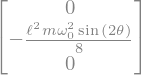

In [55]:
r0 = (l/2)*ez
a0 = a.subs([(phi_t,omega_0), (phi_tt,0)])
lv = sy.simplify(m*(R.T*r0).cross(R.T*a0))
lv

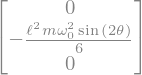

In [56]:
sy.simplify(lo+lv)

On obtient le résultat:
\begin{align}
\dot{\bm L} &= m\bm R_O \times \dot{\bm V} + \bm\Omega \times (I^G \bm\Omega)\\
&=-\frac{m\omega_0^2l^2}{8}\sin2\theta\hat{\bm y} - \frac{m\omega_0^2l^2}{24}\sin2\theta\hat{\bm y}\\
&= -\frac{m\omega_0^2l^2}{6}\sin2\theta\hat{\bm y}
\end{align}
qui coïncide avec le calcul au repère mobile.

## Repère fixe

Le point délicat est le calcul du moment cinétique $\bm L$
$$\bm L = m \bm R \times \bm V + I\bm \omega$$
et de sa dérivée par rapport au temps
$$\dot{\bm L} = m\bm R \times \dot{\bm V} + \bm\omega \times (I \bm\omega)$$
Le problème est qu'on connaît les variables cinétiques dans le repère fixe, mais on a l'expression du moment d'inertie dans le centre de masse:
$$I = \frac{ml^2}{12}\mathrm{diag}(1,1,0)$$
Pour reconcilier les deux on doit choisir le repère pour exprimer $\bm L$. Dans le cas présent, il convient de transformer $I$ dans le repère universel.

On transforme le tenseur d'inertie "centre de masse" en tenseur "fixe":
$$I_0 = RIR^T$$
à l'aide donc de la matrice de rotation.

L'autre possibilité est de travailler dans le repère mobile, comme on le montre à la fin du cahier.

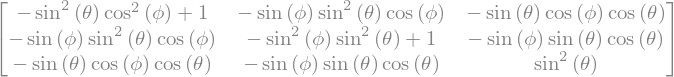

In [65]:
# tenseur I au repère fixe
RIR = R*sy.Matrix([[1,0,0],[0,1,0],[0,0,0]])*R.T
I_0 = (m*l**2/12)*RIR

sy.expand(RIR.subs(sy.cos(theta)**2,1-sy.sin(theta)**2)).subs(sy.sin(phi)**2+sy.cos(phi)**2,1)

La partie centre de masse donne:
$$ m\bm R \times \dot{\bm V} = -\frac{m\omega_0^2l^2}{4}\sin\theta\cos\theta \hat{\bm y}$$
et la partie de rotation donne:
$$\bm \omega \times (I\bm \omega) = -\frac{m\omega_0^2l^2}{12}\sin\theta \cos\theta\hat{\bm y}$$
On a en définitive:
$$\dot{\bm L} = -\frac{m\omega_0^2l^2}{3}\sin\theta \cos\theta\hat{\bm y}$$

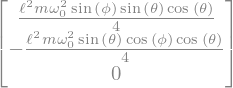

In [66]:
Lfa = m*r0.cross(a0)
Lfa

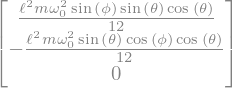

In [69]:
omega = omega_0*e3
Lf = omega.cross(I_0*omega)
Lf

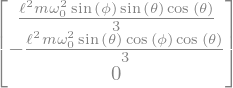

In [71]:
Lfa + Lf

ce qui correspond bien aux résultats dans les autres repères: il suffit de comparer XYZ avec xyz pour le vérifier.

## Code dessin

Le dessin de la barre utilise le package ["asymptote"](https://asymptote.sourceforge.io/index.html), lequel fait partie de $\TeX$. Il s'agit d'un langage statique, apparenté à C++. La compilation se fait par la commande `asy`:

`asy -f pdf fichier.asy`

où l'option `-f` force une sortie pdf (ou png ou svg, etc).


Voici le code (fichier "barre_z.asy"):

```cpp
import settings;
render = 4;
prc = false;

import three;
import solids;
texpreamble("\usepackage{bm}");

size(250, 0);

currentprojection  =  perspective(9, 3, 3);

pen pk = rgb(0, 0, 0);
pen pr = rgb(0.5, 0.3, 0.3);
pen pg = rgb(0.3, 0.3, 0.3);

// axes fixes
draw(Label("$X$", 1), O--X, pk, Arrow3);
draw(Label("$Y$", 1), O--Y, pk, Arrow3);
draw(Label("$Z$", 1), O--Z, pk, Arrow3);
label("$O$", O, 2*W);

// barre
real l = 1.6;
real a = 0.05;
real t = 45;
real theta = t*pi/180;
real q = 60;
real phi = q*pi/180;
triple ax = (sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta));
revolution C = cylinder(O, a, l, ax);

draw(surface(C),  gray(0.95)+opacity(0.2));
draw(C, 1bp+gray(0.7));
draw(O--l*ax, pr+opacity(0.5));

// axes mobiles (corps)
real b = 0.3;
triple r = b*(cos(phi)*X + sin(phi)*Y);
triple R = l/2*ax;
triple x = R + b*(cos(phi)*X + sin(phi)*Y)*cos(theta) - b*sin(theta)*Z;
triple y = R + b*(-sin(theta)*X + cos(theta)*Y);
triple z = R + b*ax;

draw(Label("$x$", 1, W), R--x, pg, Arrow3);
draw(Label("$y$", 1), R--y, pg, Arrow3);
draw(Label("$z$", EndPoint, align = E), R--z, pg, Arrow3);
label("$l$", l*ax+(0, -0.15, 0.0), pr+opacity(0.5));
label("$l/2$", 0.5*l*ax+(0, -0.1, 0.1), pr);

// rotation (arc de cercle)
//draw(arc(O, l/2, t, q, t, q+20),  pr);
draw(circle(O+l/2*cos(theta)*Z, l/2*sin(theta), Z), pk);
draw("$\phi$", arc(O, 0.6*b, 90, 0, 90, q),  pr, Arrow3);
draw(Label("$\theta$", N), arc(O, 0.6*b, 0, q, t, q),  pr, Arrow3);

// forces
real c = 0.4;
draw(Label("$\bm f_1$", 1, W), O--c*Z, pr, Arrow3);
draw(Label("$\bm f_2$", 1, S), O--c*(cos(phi), sin(phi), 0), pr, Arrow3);
draw(Label("$mg \hat{\bm Z}$", 1, W), R--(R-c*Z), pr, Arrow3);

// corde
real d = 3*l/4;
draw(Label("$3l/4$", EndPoint, 4*E, pr), (0,0,d*cos(theta))--(d*sin(theta)*cos(phi),d*sin(theta)*sin(phi),d*cos(theta)), 2bp+pk);
draw("$f_3$", (0,0,d*cos(theta))-- (-c*cos(phi),-c*sin(phi),d*cos(theta)), pr, Arrow3);
```